## Plotting meteo data

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

from matplotlib import pyplot as plt

plt.rcParams.update({
    "text.usetex": True,
    "font.family": "serif",
    "font.serif": ["Palatino"],
})
plt.rcParams['text.latex.preamble'] = r'\usepackage{amsmath} \usepackage{gensymb} \usepackage{siunitx}'
plt.rcParams['font.size'] = 15
plt.rcParams['legend.fontsize'] = 12

### Loading data

In [2]:
cn_data = pd.read_csv('meteo_Clermont_rebuild.csv', index_col='t')
hs_data = pd.read_csv('meteo_hydroshoot.csv', sep=';', index_col='time')

print(cn_data.head())
print(hs_data.head())

print(cn_data.shape)
print(hs_data.shape)

   air_temperature  humidity  ambient_CO2  Wind      PARi
t                                                        
0             19.1      0.84          360   2.2  0.000000
1             17.9      0.90          360   2.2  0.000000
2             17.1      0.94          360   2.2  0.000000
3             16.7      0.94          360   2.2  0.000000
4             16.5      0.94          360   2.2  5.611111
                       Tac     hs      u    R   Rg
time                                              
2012-01-01 00:00:00  14.70  58.36  3.146  0.0  0.0
2012-01-01 01:00:00  14.30  61.21  2.883  0.0  0.0
2012-01-01 02:00:00  14.50  57.69  2.444  0.0  0.0
2012-01-01 03:00:00  14.70  57.35  2.228  0.0  0.0
2012-01-01 04:00:00  13.28  64.67  1.803  0.0  0.0
(1224, 5)
(8332, 5)


### Plotting data

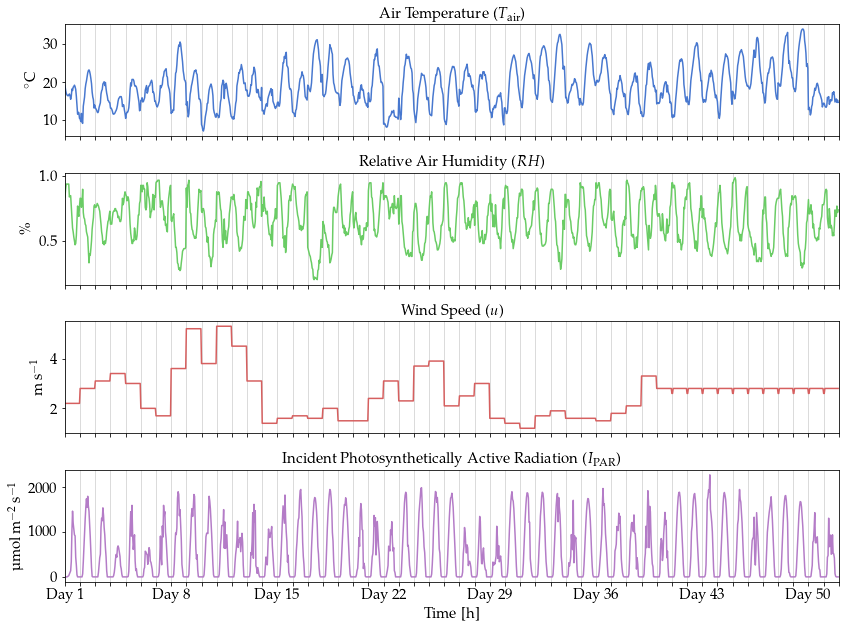

In [3]:
data = cn_data
columns = ['air_temperature', 'humidity', 'Wind', 'PARi']

symbols = {
    "air_temperature": r"$\unit{\celsius}$",
    "humidity": r"\%",
    "PARi": r"$\unit{\micro\mole\per\square\metre\per\second}$",
    "Wind": r"$\unit{\meter\per\second}$",
}

names = {
    "air_temperature": r"Air Temperature ($T_{\text{air}}$)",
    "humidity": r"Relative Air Humidity ($RH$)",
    "PARi": r"Incident Photosynthetically Active Radiation ($I_{\text{PAR}}$)",
    "Wind": r"Wind Speed ($u$)",
}


with plt.style.context('seaborn-muted'):
  fig, axs = plt.subplots(len(columns), 1, figsize=(12, 9), sharex=True)
  colors = sns.color_palette()
  
  
  for col, ax, color in zip(columns, axs.flatten(), colors):
    # Plot data
    sns.lineplot(x=data.index, y=data[col], ax=ax, color=color)

    # Configure X axis
    TICKRATE = 1
    LABELRATE = 7
    x_ticks = np.arange(0, len(data) + 1, 24 * TICKRATE)
    ax.set_xticks(x_ticks)
    x_ticklabels = [f'Day {(i // 24) + 1}' if not i % (24 * LABELRATE) else '' for i in x_ticks]
    ax.set_xticklabels(x_ticklabels)
    ax.set_xlabel(r'Time [\unit{\hour}]')
    ax.set_xlim(0, len(data))
    ax.grid(axis='x', linestyle='solid', color='lightgrey')
    ax.set_title(names[col], fontsize=15)

    # Configure Y axis
    ax.set_ylabel(symbols[col])

  plt.tight_layout()
  plt.savefig('cn_inputs.png', dpi=200, facecolor='white')

In [4]:
hs_data.loc[(hs_data.index > '2012-06') & (hs_data.index < '2012-09')].shape

(2208, 5)

In [5]:
import arrow

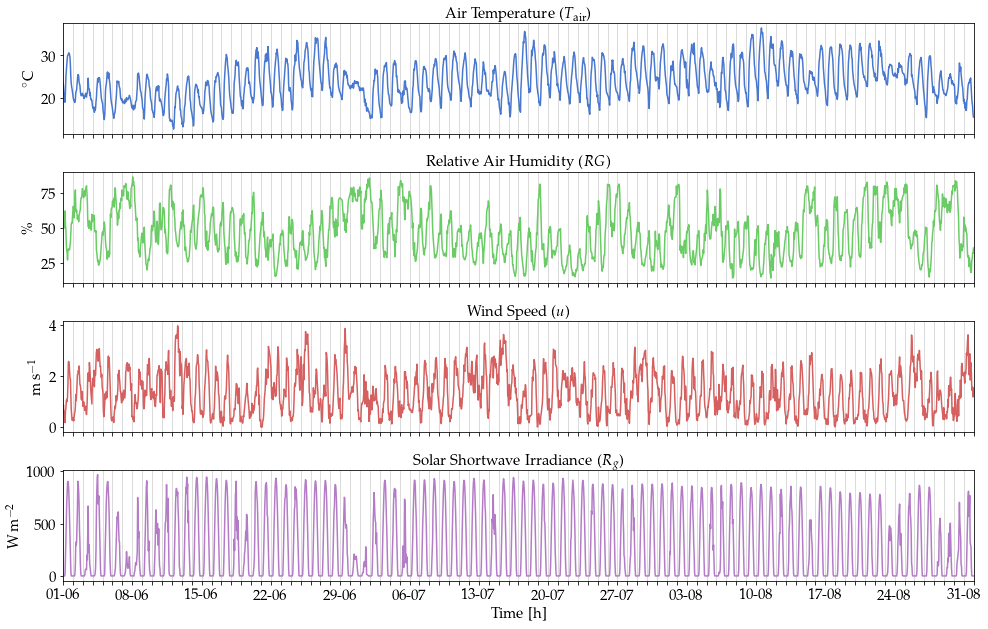

In [6]:
from collections import defaultdict

data = hs_data.loc[(hs_data.index > '2012-06') & (hs_data.index < '2012-09')]
columns = ['Tac', 'hs', 'u', 'Rg']

# symbols = defaultdict(lambda: 'To-do')
symbols = {
    "Tac": r"$\unit{\celsius}$",
    "hs": r"\%",
    "u": r"$\unit{\meter\per\second}$",
    "Rg": r"$\unit{\watt\per\meter\squared}$",
}

names = defaultdict(lambda: 'To-do')
names = {
    "Tac": r"Air Temperature ($T_{\text{air}}$)",
    "hs": r"Relative Air Humidity ($RG$)",
    "u": r"Wind Speed ($u$)",
    "Rg": r"Solar Shortwave Irradiance ($R_g$)",
}


with plt.style.context('seaborn-muted'):
  fig, axs = plt.subplots(len(columns), 1, figsize=(14, 9), sharex=True)
  colors = sns.color_palette()
  
  
  for col, ax, color in zip(columns, axs.flatten(), colors):
    # Plot data
    sns.lineplot(x=data.index, y=data[col], ax=ax, color=color)

    # Configure X axis
    TICKRATE = 1
    LABELRATE = 7
    x_ticks = np.arange(0, len(data) + 1, 24 * TICKRATE)
    ax.set_xticks(x_ticks)
    # x_ticklabels = [f'Day {(i // 24) + 1}' if not i % (24 * LABELRATE) else '' for i in x_ticks]
    x_ticklabels = [f'{arrow.get(data.index[i]).format("DD-MM")}' if not i % (24 * LABELRATE) else '' for i in x_ticks]
    ax.set_xticklabels(x_ticklabels)
    ax.set_xlabel(r'Time [\unit{\hour}]')
    ax.set_xlim(0, len(data))
    ax.grid(axis='x', linestyle='solid', color='lightgrey')
    ax.set_title(names[col], fontsize=15)

    # Configure Y axis
    ax.set_ylabel(symbols[col])

  plt.tight_layout()
  plt.savefig('hs_inputs.png', dpi=200, facecolor='white')